<a href="https://colab.research.google.com/github/skywalker0803r/works/blob/master/bert_dqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
#!pip install googletrans==3.1.0a0
#!pip install transformers
#!pip install tensorflow==1.14.0
#!pip install stable-baselines3[extra]
#!pip install stable-baselines[mpi]

In [96]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Amazing Gift for Nick1 (1) (1).xlsx')
df

,speak_id,Content,r1score,r2score,r3score,r4score,response1,response2,response3,response4,keywords,intention,emotionlabel,f4,event,entity,relation
0,Student test1,你覺得尼克一開始的反應怎麼樣,1.0,NaN,NaN,NaN,i think nick 's initial reaction was a little ...,What does Nick start to do?,disgust,Who starts to play with the baby?,NaN,SetQ,neutral,Feedback,NaN,NaN,NaN
1,Student test2,"真是過分,怎麼可以欺負小寶寶",0.0,NaN,NaN,NaN,i think it is too much . it is a little bit to...,What do Nick's mom and dad say to the baby?,"Nick smiles and says, I'm a big brother",What kind of robot does the baby crawl to?,NaN,Statement,fear,Nothing,NaN,NaN,NaN
2,Student test1,可能是因為他沒辦法接受吧,0.0,NaN,NaN,NaN,but he does not understand . it is a very smal...,"Who shouts: ""Don't touch it. That's my robot!""",That's not my brother,What does Nick's mom say to the baby?,NaN,Statement,sadness,Feeling,NaN,NaN,NaN
3,Student test2,因為母愛要被分走了?,-1.0,NaN,NaN,NaN,"it is too late , he is only a baby .",What kind of robot does the baby crawl to?,"Nick smiles and says, I'm a big brother",Nick looks back at Nick with what?,NaN,PropQ,surprise,Nothing,NaN,NaN,NaN
4,Student test1,如果是我的話 突然有一個新的人加進我的家庭 我也會覺得很奇怪,0.0,-1.0,NaN,NaN,that is understandable . i hope it is not for ...,What does Nick say to the baby?,I'm a big brother,What does Nick look at the baby with?,NaN,Statement,surprise,Feeling,NaN,NaN,NaN
5,Student test2,太可憐了,NaN,NaN,1.0,NaN,oh no ! that must be so scary .,What does the baby look back at Nick with?,It is so nice to take care of others,What does Nick say the baby points to a toy gi...,NaN,Statement,sadness,Nothing,NaN,NaN,NaN
6,Student test1,"而且還要承擔責任,好慘,你看尼克最一開始還想要把他丟了",1.0,NaN,NaN,NaN,i understand . i am sure he would have been de...,What does Nick want to do to the baby?,It is so nice to take care of others,What does Nick say to the baby?,NaN,Statement,disgust,Feeling,NaN,NaN,NaN
7,Student test2,但是丟到垃圾桶真的太過分了,1.0,NaN,NaN,NaN,that is too bad . i would have been furious,What does Nick say the baby points to a toy gi...,Nick wants to put the baby in a trash can and ...,What does Nick start to do?,NaN,Statement,disgust,Future,NaN,NaN,NaN
8,Student test1,還想了各種方法,-1.0,NaN,NaN,-1.0,"that is good , but there is a lot of work to b...",What do Nick's mom and dad say when they come ...,It is so nice to take care of others,What does Nick say to the baby?,NaN,Statement,neutral,Feeling,NaN,NaN,NaN
9,Student test2,太壞了,-1.0,NaN,-1.0,NaN,that would be a good idea . what would you do ?,What do the baby crawls to Nick and opens his ...,That's not my brother,What does the baby look back at Nick with?,NaN,Statement,disgust,Future,NaN,NaN,NaN


In [97]:
df.columns

Index(['speak_id', 'Content', 'r1score', 'r2score', 'r3score', 'r4score',
       'response1', 'response2', 'response3', 'response4', 'keywords',
       'intention', 'emotionlabel', 'f4', 'event', 'entity', 'relation'],
      dtype='object')

In [98]:
df[['Content', 'r1score', 'r2score', 'r3score', 'r4score',
       'response1', 'response2', 'response3', 'response4',
       'intention', 'emotionlabel', 'f4']]

,Content,r1score,r2score,r3score,r4score,response1,response2,response3,response4,intention,emotionlabel,f4
0,你覺得尼克一開始的反應怎麼樣,1.0,NaN,NaN,NaN,i think nick 's initial reaction was a little ...,What does Nick start to do?,disgust,Who starts to play with the baby?,SetQ,neutral,Feedback
1,"真是過分,怎麼可以欺負小寶寶",0.0,NaN,NaN,NaN,i think it is too much . it is a little bit to...,What do Nick's mom and dad say to the baby?,"Nick smiles and says, I'm a big brother",What kind of robot does the baby crawl to?,Statement,fear,Nothing
2,可能是因為他沒辦法接受吧,0.0,NaN,NaN,NaN,but he does not understand . it is a very smal...,"Who shouts: ""Don't touch it. That's my robot!""",That's not my brother,What does Nick's mom say to the baby?,Statement,sadness,Feeling
3,因為母愛要被分走了?,-1.0,NaN,NaN,NaN,"it is too late , he is only a baby .",What kind of robot does the baby crawl to?,"Nick smiles and says, I'm a big brother",Nick looks back at Nick with what?,PropQ,surprise,Nothing
4,如果是我的話 突然有一個新的人加進我的家庭 我也會覺得很奇怪,0.0,-1.0,NaN,NaN,that is understandable . i hope it is not for ...,What does Nick say to the baby?,I'm a big brother,What does Nick look at the baby with?,Statement,surprise,Feeling
5,太可憐了,NaN,NaN,1.0,NaN,oh no ! that must be so scary .,What does the baby look back at Nick with?,It is so nice to take care of others,What does Nick say the baby points to a toy gi...,Statement,sadness,Nothing
6,"而且還要承擔責任,好慘,你看尼克最一開始還想要把他丟了",1.0,NaN,NaN,NaN,i understand . i am sure he would have been de...,What does Nick want to do to the baby?,It is so nice to take care of others,What does Nick say to the baby?,Statement,disgust,Feeling
7,但是丟到垃圾桶真的太過分了,1.0,NaN,NaN,NaN,that is too bad . i would have been furious,What does Nick say the baby points to a toy gi...,Nick wants to put the baby in a trash can and ...,What does Nick start to do?,Statement,disgust,Future
8,還想了各種方法,-1.0,NaN,NaN,-1.0,"that is good , but there is a lot of work to b...",What do Nick's mom and dad say when they come ...,It is so nice to take care of others,What does Nick say to the baby?,Statement,neutral,Feeling
9,太壞了,-1.0,NaN,-1.0,NaN,that would be a good idea . what would you do ?,What do the baby crawls to Nick and opens his ...,That's not my brother,What does the baby look back at Nick with?,Statement,disgust,Future


In [99]:
import numpy as np
label = df[['r1score', 'r2score', 'r3score', 'r4score']].fillna(-999)
label = pd.get_dummies(label.T.apply(np.argmax)).values
label

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [100]:
df[['Content','intention', 'emotionlabel', 'f4']]

,Content,intention,emotionlabel,f4
0,你覺得尼克一開始的反應怎麼樣,SetQ,neutral,Feedback
1,"真是過分,怎麼可以欺負小寶寶",Statement,fear,Nothing
2,可能是因為他沒辦法接受吧,Statement,sadness,Feeling
3,因為母愛要被分走了?,PropQ,surprise,Nothing
4,如果是我的話 突然有一個新的人加進我的家庭 我也會覺得很奇怪,Statement,surprise,Feeling
5,太可憐了,Statement,sadness,Nothing
6,"而且還要承擔責任,好慘,你看尼克最一開始還想要把他丟了",Statement,disgust,Feeling
7,但是丟到垃圾桶真的太過分了,Statement,disgust,Future
8,還想了各種方法,Statement,neutral,Feeling
9,太壞了,Statement,disgust,Future


In [101]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

inputs = ["a", "a"*20, "a"*100, "abcede"*200]
for i in inputs:
  inputs = tokenizer(i, padding='max_length', truncation=True, max_length = 15, return_tensors="pt")
  print(inputs["input_ids"])
  outputs = model(**inputs)
  print(outputs.last_hidden_state.shape, i, len(i))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[ 101, 1037,  102,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0]])
torch.Size([1, 15, 768]) a 1
tensor([[  101, 13360, 11057, 11057, 11057, 11057, 11057, 11057, 11057, 11057,
          2050,   102,     0,     0,     0]])
torch.Size([1, 15, 768]) aaaaaaaaaaaaaaaaaaaa 20
tensor([[  101, 13360, 11057, 11057, 11057, 11057, 11057, 11057, 11057, 11057,
         11057, 11057, 11057, 11057,   102]])
torch.Size([1, 15, 768]) aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa 100
tensor([[101, 100, 102,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0]])
torch.Size([1, 15, 768]) abcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcedeabcede

In [102]:
import googletrans
translator = googletrans.Translator()
results = translator.translate('我覺得今天天氣不好')
print(results)
print(results.text)

Translated(src=zh-CN, dest=en, text=I think the weather is bad today, pronunciation=None, extra_data="{'translat...")
I think the weather is bad today


# preprocess_model

In [121]:
import torch
class preprocess_model(object):
  def __init__(self):
    super().__init__()
    self.translator = googletrans.Translator()
    self.tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
    self.bert_model = AutoModel.from_pretrained("bert-base-uncased")

  def __call__(self,sentence):
    x = self.translator.translate(sentence).text #translate
    x = self.tokenizer(x, padding='max_length', truncation=True, max_length = 15, return_tensors="pt") #tokenizer
    x = torch.flatten(self.bert_model(**x).last_hidden_state)[::40]#bert forward and skip
    return x

In [123]:
預處理模型 = preprocess_model()
預處理模型('弟弟不要,brother no').shape
n = 預處理模型('弟弟不要,brother no').shape[0]
n

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


288

In [124]:
x = ''.join(df[['Content','intention', 'emotionlabel', 'f4']].head(1).values[0])
print(x)
display(預處理模型(x))
print(預處理模型(x).shape)

你覺得尼克一開始的反應怎麼樣SetQneutralFeedback


tensor([ 1.0863e-01, -3.9423e-01,  4.0619e-03, -1.7951e-01,  2.8002e-01,
        -6.7137e-02,  2.0218e-01,  9.6021e-02, -8.6413e-03,  1.2302e+00,
         1.8516e-01, -3.1046e-01, -2.6357e-01, -1.7287e-01, -4.8228e-01,
        -5.2405e-02, -1.3728e-01,  2.0004e-01, -1.9421e-01,  2.2402e-01,
        -1.2229e+00, -4.9952e-01, -5.4128e-01, -4.0635e-02, -1.1059e-01,
         7.4345e-01,  8.2216e-01, -8.7409e-01,  1.3861e+00, -9.0687e-01,
         6.1707e-01, -4.7690e-02,  4.5554e-01,  1.7794e-01,  6.3722e-03,
        -2.2340e-01,  8.0036e-01,  1.0578e-01, -3.5221e+00,  2.6866e-01,
         9.9344e-01, -8.3739e-02,  5.8339e-01,  1.0435e+00,  5.1309e-01,
        -4.5836e-02, -6.2131e-01, -6.8225e-01,  1.0652e-01,  7.1087e-01,
         8.3725e-01,  5.7243e-01, -6.6055e-01, -5.2775e-02,  6.9403e-02,
         1.1544e+00,  4.2960e-01, -1.9118e-01,  2.5588e-02,  2.3938e-01,
         6.4581e-01,  8.7447e-01, -3.6889e-01, -2.2029e-01, -5.0327e-01,
         1.9842e-01, -1.3326e+00,  1.2677e-01,  5.3

torch.Size([288])


In [125]:
預處理模型(x).min(),預處理模型(x).max()

(tensor(-3.5221, grad_fn=<MinBackward1>),
 tensor(1.3861, grad_fn=<MaxBackward1>))

In [126]:
x = ''.join(df[['Content','intention', 'emotionlabel', 'f4']].head(1).values[0])
x = 預處理模型(x)
x.detach().numpy()

array([ 1.08627260e-01, -3.94234806e-01,  4.06187307e-03, -1.79506361e-01,
        2.80016929e-01, -6.71372786e-02,  2.02182800e-01,  9.60211158e-02,
       -8.64134263e-03,  1.23016560e+00,  1.85160369e-01, -3.10457021e-01,
       -2.63565719e-01, -1.72868744e-01, -4.82275993e-01, -5.24045229e-02,
       -1.37284085e-01,  2.00039029e-01, -1.94207519e-01,  2.24016026e-01,
       -1.22288442e+00, -4.99517590e-01, -5.41275024e-01, -4.06345539e-02,
       -1.10590428e-01,  7.43447542e-01,  8.22162330e-01, -8.74090850e-01,
        1.38609087e+00, -9.06872630e-01,  6.17067933e-01, -4.76900339e-02,
        4.55540836e-01,  1.77937984e-01,  6.37220731e-03, -2.23396540e-01,
        8.00358295e-01,  1.05783269e-01, -3.52212024e+00,  2.68664002e-01,
        9.93439853e-01, -8.37385356e-02,  5.83390653e-01,  1.04354727e+00,
        5.13088167e-01, -4.58357483e-02, -6.21307552e-01, -6.82251871e-01,
        1.06522679e-01,  7.10866570e-01,  8.37248564e-01,  5.72428644e-01,
       -6.60554111e-01, -

In [127]:
idx = 0
df[['Content','intention', 'emotionlabel', 'f4']].loc[idx]

Content         你覺得尼克一開始的反應怎麼樣
intention                 SetQ
emotionlabel           neutral
f4                    Feedback
Name: 0, dtype: object

In [128]:
idx = 0
''.join(df[['Content','intention', 'emotionlabel', 'f4']].loc[idx,:].values)

'你覺得尼克一開始的反應怎麼樣SetQneutralFeedback'

# Chatbotenv

In [158]:
import numpy as np
import gym
from gym import spaces

class ChatbotEnv(gym.Env):
  metadata = {'render.modes': ['console']}
  def __init__(self, df):
    super(ChatbotEnv, self).__init__()
    self.idx = 0
    self.features_df = df[['Content','intention', 'emotionlabel', 'f4']]
    self.label_array = df[['r1score', 'r2score', 'r3score', 'r4score']].fillna(-999)
    self.label_array = pd.get_dummies(self.label_array.T.apply(np.argmax)).values
    self.預處理模型 = preprocess_model()
    self.action_space = spaces.Discrete(4)
    self.observation_space = spaces.Box(low=-10,high=10,shape=(n,), dtype=np.float32)
    self.action = 0

  def reset(self):
    self.idx = 0
    state = ''.join(self.features_df.loc[self.idx,:].values)
    state = self.預處理模型(state)
    return state.detach().numpy().reshape(n,)

  def step(self, action):
    self.action = action
    answer = np.argmax(self.label_array[self.idx])
    if action == answer:
      reward = 1
    else:
      reward = 0
    done = bool(self.idx == len(self.features_df))
    info = {'answer':answer}
    self.idx += 1
    if self.idx >= len(self.features_df):
      self.idx -= 1
    state = ''.join(self.features_df.loc[self.idx,:].values)
    state = self.預處理模型(state)
    return state.detach().numpy().reshape(n,), reward, done, info

  def render(self):
    print('idx:',self.idx)
    print('sentence:',''.join(self.features_df.loc[self.idx,:].values))
    print('action:',self.action)
    print('answer:',np.argmax(self.label_array[self.idx]))
    print('is correct?',self.action == np.argmax(self.label_array[self.idx]))

  def close(self):
    pass
    

In [159]:
env = ChatbotEnv(df)
env

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [139]:
env.reset()

array([ 1.08627260e-01, -3.94234806e-01,  4.06187307e-03, -1.79506361e-01,
        2.80016929e-01, -6.71372786e-02,  2.02182800e-01,  9.60211158e-02,
       -8.64134263e-03,  1.23016560e+00,  1.85160369e-01, -3.10457021e-01,
       -2.63565719e-01, -1.72868744e-01, -4.82275993e-01, -5.24045229e-02,
       -1.37284085e-01,  2.00039029e-01, -1.94207519e-01,  2.24016026e-01,
       -1.22288442e+00, -4.99517590e-01, -5.41275024e-01, -4.06345539e-02,
       -1.10590428e-01,  7.43447542e-01,  8.22162330e-01, -8.74090850e-01,
        1.38609087e+00, -9.06872630e-01,  6.17067933e-01, -4.76900339e-02,
        4.55540836e-01,  1.77937984e-01,  6.37220731e-03, -2.23396540e-01,
        8.00358295e-01,  1.05783269e-01, -3.52212024e+00,  2.68664002e-01,
        9.93439853e-01, -8.37385356e-02,  5.83390653e-01,  1.04354727e+00,
        5.13088167e-01, -4.58357483e-02, -6.21307552e-01, -6.82251871e-01,
        1.06522679e-01,  7.10866570e-01,  8.37248564e-01,  5.72428644e-01,
       -6.60554111e-01, -

In [140]:
env.reset().shape

(288,)

In [141]:
env.step(0)

(array([-1.74716756e-01, -1.83599427e-01,  9.11996588e-02, -1.51168615e-01,
         1.83654696e-01, -1.49565712e-02,  2.82947570e-01,  5.04960537e-01,
        -2.63946056e-02,  1.19650054e+00, -1.54384956e-01, -3.31155062e-01,
        -3.30267757e-01, -3.36736828e-01, -1.43387645e-01,  8.60434920e-02,
        -3.62933874e-01, -3.53609435e-02,  6.95953310e-01,  3.73101197e-02,
        -4.32136387e-01, -5.30164540e-02, -1.64805263e-01, -8.72946978e-02,
         1.08121760e-01,  5.41714668e-01, -8.08308572e-02, -5.28100014e-01,
         6.61151409e-01, -1.31239653e-01, -9.91714835e-01,  8.45412731e-01,
         1.28817528e-01,  1.05986655e-01, -4.44985569e-01,  2.57659674e-01,
         2.74441898e-01,  1.78829387e-01, -1.56644022e+00,  3.41944426e-01,
        -3.18418816e-02, -9.73792791e-01, -2.17833161e-01,  1.42243221e-01,
         2.79149264e-01, -5.32717943e-01, -7.87010670e-01, -5.69706142e-01,
        -1.21845424e-01, -1.80325970e-01,  2.31645077e-01,  2.99479127e-01,
        -2.3

In [142]:
env.render()

idx: 1
sentence: 真是過分,怎麼可以欺負小寶寶StatementfearNothing
action: 0
answer: 0
is correct? True


# DQN MODEL

In [160]:
import gym
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines import DQN
import warnings
from tqdm import tqdm_notebook as tqdm
warnings.filterwarnings('ignore')

def train(epochs):
  env = ChatbotEnv(df)
  model = DQN(MlpPolicy, env, verbose=1)
  model.learn(total_timesteps=epochs)
  model.save("deepq_model")
  del model # remove to demonstrate saving and loading
  model = DQN.load("deepq_model")
  return model

def evaluate(model):
  obs = env.reset()
  total_reward = 0
  for i in tqdm(range(100)):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    total_reward += rewards
    #print('total_reward',total_reward)
    #env.render()
  return total_reward

# result

In [144]:
result = [evaluate(train(epochs=10)),evaluate(train(epochs=100)),evaluate(train(epochs=1000)),evaluate(train(epochs=2000))]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Loading a model without an environment, this model cannot be trained until it has a valid environment.


  0%|          | 0/100 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Loading a model without an environment, this model cannot be trained until it has a valid environment.


  0%|          | 0/100 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Loading a model without an environment, this model cannot be trained until it has a valid environment.


  0%|          | 0/100 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Loading a model without an environment, this model cannot be trained until it has a valid environment.


  0%|          | 0/100 [00:00<?, ?it/s]

In [145]:
result

[2, 22, 86, 93]

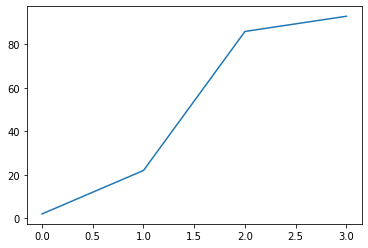

In [146]:
import matplotlib.pyplot as plt
plt.plot(result)

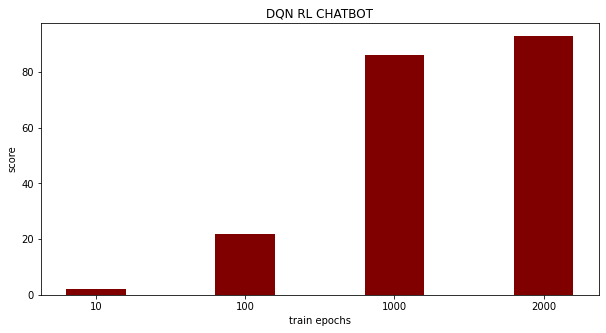

In [151]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'10':result[0], '100':result[1], '1000':result[2],'2000':result[3]}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)

plt.xlabel("train epochs")
plt.ylabel("score")
plt.title("DQN RL CHATBOT")
plt.show()

# acc recall f1

In [174]:
model = train(epochs=2000)
model

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [175]:
def evaluate(model):
  y_true = []
  y_pred = []
  obs = env.reset()
  total_reward = 0
  for i in tqdm(range(100)):
    action, _states = model.predict(obs)
    y_pred.append(action)
    obs, rewards, dones, info = env.step(action)
    y_true.append(info['answer'])
    total_reward += rewards
    #print('total_reward',total_reward)
    #env.render()
  return total_reward,y_true,y_pred

In [176]:
total_reward,y_true,y_pred = evaluate(model)

  0%|          | 0/100 [00:00<?, ?it/s]

In [180]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
m = min(len(y_true),len(y_pred))
print('total_reward:',total_reward)
print(classification_report(y_true[:m], y_pred[:m], target_names=target_names))

total_reward: 90
              precision    recall  f1-score   support

     class 0       0.96      0.95      0.95        95
     class 1       0.00      0.00      0.00         3
     class 2       0.00      0.00      0.00         2

    accuracy                           0.90       100
   macro avg       0.32      0.32      0.32       100
weighted avg       0.91      0.90      0.90       100

